# Chapter 6, Example 2a

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = 5

no_folds = 3

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

In [4]:
idx = np.arange(no_data)
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]
nf = no_data//no_folds

print(nf)
    
acc = []
for fold in range(no_folds):
    start, end = fold*nf, (fold+1)*nf
    x_test, y_test = X[start:end], Y[start:end]
    x_train  = np.append(X[:start], X[end:], axis=0)
    y_train = np.append(Y[:start], Y[end:], axis=0) 
    
    model = Sequential([
        Dense(hidden_units, activation='relu'),
        Dense(no_labels, activation='softmax')])
    
    model.compile(optimizer='sgd', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=False,
                    validation_data=(x_test, y_test))
    
    acc.append(history.history['val_accuracy'][no_epochs-1])
    
    print('fold %d test accuracy %g'%(fold, acc[fold]))
    
print('* mean accuracy = %g *'% np.mean(acc))

50
fold 0 test accuracy 0.98
fold 1 test accuracy 0.98
fold 2 test accuracy 0.96
* mean accuracy = 0.973333 *


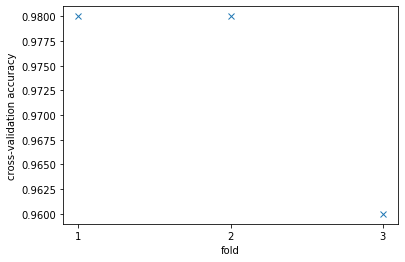

In [5]:
plt.figure(1)
plt.plot([1, 2, 3], acc, marker = 'x', linestyle = 'None')
plt.xticks([1, 2, 3])
plt.xlabel('fold')
plt.ylabel('cross-validation accuracy')
plt.savefig('./figures/6.2a_1.png')
plt.show()